## WeatherPy Main Workfile

### Initial identification

In [18]:
#!pip install arrow # this module is to get now() date

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import arrow
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

api_key = weather_api_key
#print(api_key)
len(cities)

649

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# parameters

url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f'{url}appid={api_key}&units={units}&q='


In [4]:
# list names for dataframe
city_name = []
cloudiness = []
dates = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

In [5]:
# counters to store record counts and sets of 50 counts
record_count = 0
set_count = 1

In [6]:
# loop through list of random cities

print(f'Beginning Data Retrieval')
print('-------------------------------')

for index, city in enumerate(cities):
    
    #time.sleep(1) # Add a one second interval between queries to stay within API query limits   

    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        if record_count > 49:
            record_count = 0
            set_count += 1
        else:
            record_count += 1

        print(f"Processing Record {record_count} of Set {set_count} | {city}")
  
    except(KeyError, IndexError):
        
        print("City not found. Skipping...")
        
print('-------------------------------')
print('Data Retrieval Complete ')
print('-------------------------------')

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | araouane
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | nowy tomysl
Processing Record 4 of Set 1 | paracuru
Processing Record 5 of Set 1 | leningradskiy
Processing Record 6 of Set 1 | swan hill
City not found. Skipping...
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | hokitika
Processing Record 10 of Set 1 | baraboo
Processing Record 11 of Set 1 | sargodha
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | smithers
Processing Record 14 of Set 1 | ribeira grande
City not found. Skipping...
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | salta
Processing Record 18 of Set 1 | northam
Processing Record 19 of Set 1 | palmer
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | sembe
P

Processing Record 32 of Set 4 | skjervoy
Processing Record 33 of Set 4 | hamilton
Processing Record 34 of Set 4 | namatanai
Processing Record 35 of Set 4 | burnie
Processing Record 36 of Set 4 | chicama
Processing Record 37 of Set 4 | seoul
Processing Record 38 of Set 4 | clyde river
Processing Record 39 of Set 4 | thompson
Processing Record 40 of Set 4 | mayo
City not found. Skipping...
Processing Record 41 of Set 4 | lebu
Processing Record 42 of Set 4 | stromness
Processing Record 43 of Set 4 | abnub
Processing Record 44 of Set 4 | narsaq
Processing Record 45 of Set 4 | takoradi
Processing Record 46 of Set 4 | pytalovo
Processing Record 47 of Set 4 | ixtapa
Processing Record 48 of Set 4 | nurota
Processing Record 49 of Set 4 | camacha
Processing Record 50 of Set 4 | lagos
Processing Record 0 of Set 5 | ponta do sol
City not found. Skipping...
Processing Record 1 of Set 5 | lockport
City not found. Skipping...
Processing Record 2 of Set 5 | ukiah
Processing Record 3 of Set 5 | oktyabr

Processing Record 16 of Set 8 | russkaya polyana
City not found. Skipping...
Processing Record 17 of Set 8 | luwuk
Processing Record 18 of Set 8 | wittlich
Processing Record 19 of Set 8 | rawah
Processing Record 20 of Set 8 | provideniya
Processing Record 21 of Set 8 | nuuk
Processing Record 22 of Set 8 | pervomayskoye
Processing Record 23 of Set 8 | rocha
Processing Record 24 of Set 8 | okhotsk
Processing Record 25 of Set 8 | tautira
City not found. Skipping...
Processing Record 26 of Set 8 | la ronge
Processing Record 27 of Set 8 | port lincoln
Processing Record 28 of Set 8 | bereda
Processing Record 29 of Set 8 | cabedelo
Processing Record 30 of Set 8 | palmeira das missoes
Processing Record 31 of Set 8 | yabucoa
Processing Record 32 of Set 8 | almaznyy
Processing Record 33 of Set 8 | necochea
Processing Record 34 of Set 8 | port hedland
Processing Record 35 of Set 8 | suzhou
City not found. Skipping...
Processing Record 36 of Set 8 | great bend
Processing Record 37 of Set 8 | iluli

Processing Record 49 of Set 11 | road town
Processing Record 50 of Set 11 | dwarka
Processing Record 0 of Set 12 | yabrud
Processing Record 1 of Set 12 | yar-sale
Processing Record 2 of Set 12 | khandbari
Processing Record 3 of Set 12 | pizarro
Processing Record 4 of Set 12 | beni
Processing Record 5 of Set 12 | abancay
Processing Record 6 of Set 12 | byron bay
Processing Record 7 of Set 12 | coolum beach
Processing Record 8 of Set 12 | praia da vitoria
Processing Record 9 of Set 12 | elat
Processing Record 10 of Set 12 | zhangjiakou
Processing Record 11 of Set 12 | arkhangelsk
Processing Record 12 of Set 12 | gisborne
Processing Record 13 of Set 12 | middelburg
Processing Record 14 of Set 12 | hovd
Processing Record 15 of Set 12 | macenta
Processing Record 16 of Set 12 | gao
Processing Record 17 of Set 12 | nanortalik
City not found. Skipping...
Processing Record 18 of Set 12 | neyvo-shaytanskiy
Processing Record 19 of Set 12 | coihueco
Processing Record 20 of Set 12 | vigrestad
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# first create the dataframe for the list of responses and display
city_weather_df = pd.DataFrame({'City': city_name, 
                                  'Latitude': lat, 
                                  'Longitude': lon, 
                                  'Max Temp': max_temp, 
                                  'Humidity': humidity, 
                                  'Cloudiness': cloudiness, 
                                  'Wind Speed': wind_speed, 
                                  'Date': dates})
city_weather_df.head()

#second save and export dataframe to final outputs folder

#city_weather_df.to_csv("Final_Outputs/cities_final.csv", index = False)


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Araouane,18.90,-3.53,88.88,12,100,9.01,1604338267
1,Rikitea,-23.12,-134.97,72.32,82,70,21.05,1604338320
2,Nowy Tomyśl,52.32,16.13,59.00,93,100,2.24,1604338083
3,Paracuru,-3.41,-39.03,82.00,76,31,20.00,1604338321
4,Leningradskiy,69.38,178.42,15.82,84,100,4.27,1604338321


### Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# check for cities with humidity greater than 100%: no cities over 100 humidity ---- > move on
humidity_check = city_weather_df.loc[city_weather_df['Humidity'] > 100,:]
humidity_check

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

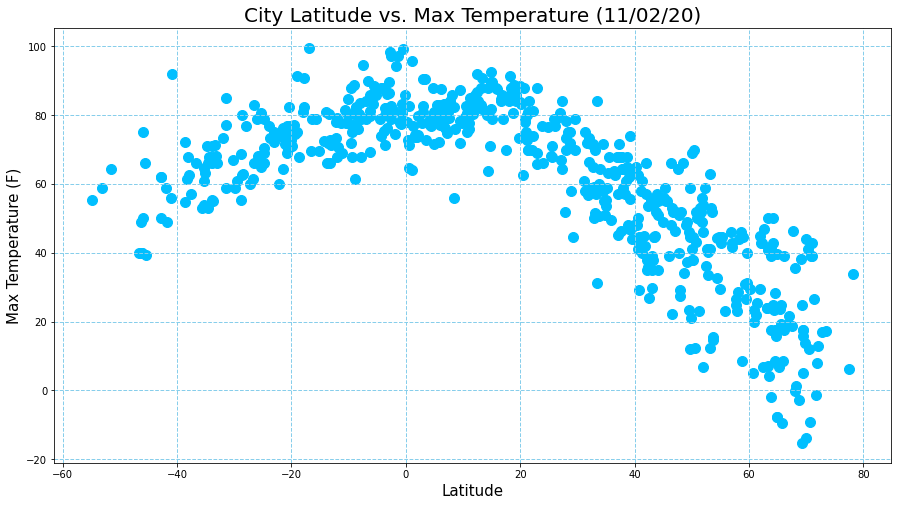

In [42]:
plt.figure(figsize=(15,8))
todayDate = arrow.now().format('MM/DD/YY')
plt.scatter(city_weather_df['Latitude'], city_weather_df['Max Temp'], s=100, c='deepskyblue')
plt.title(f'City Latitude vs. Max Temperature ({todayDate})',fontsize =20)
plt.xlabel('Latitude',fontsize =15)
plt.ylabel('Max Temperature (F)',fontsize =15)
plt.grid(color='skyblue', linestyle='--', linewidth=1)
plt.show()

### Latitude vs. Humidity Plot

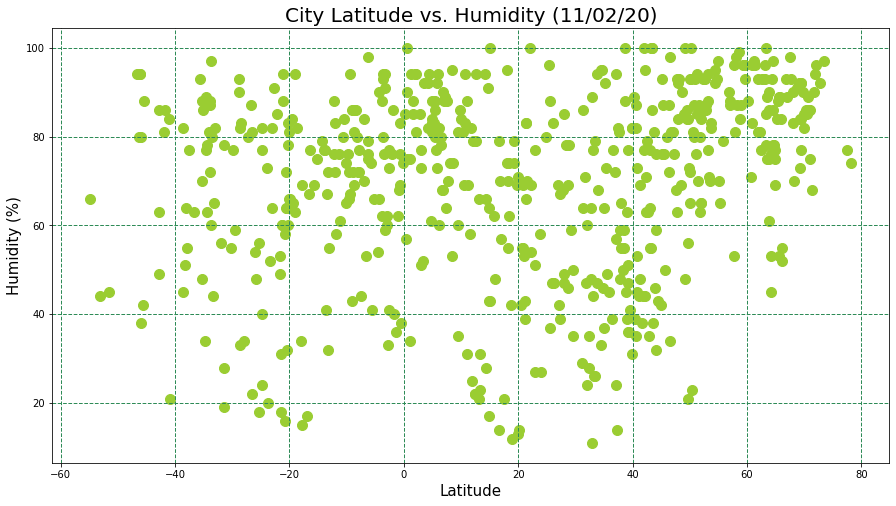

In [47]:
plt.figure(figsize=(15,8))
plt.scatter(city_weather_df['Latitude'], city_weather_df['Humidity'], s=100, c='yellowgreen')
plt.title(f'City Latitude vs. Humidity ({todayDate})',fontsize =20)
plt.xlabel('Latitude',fontsize =15)
plt.ylabel('Humidity (%)',fontsize =15)
plt.grid(color='seagreen', linestyle='--', linewidth=1)
plt.show()

### Latitude vs. Cloudiness Plot

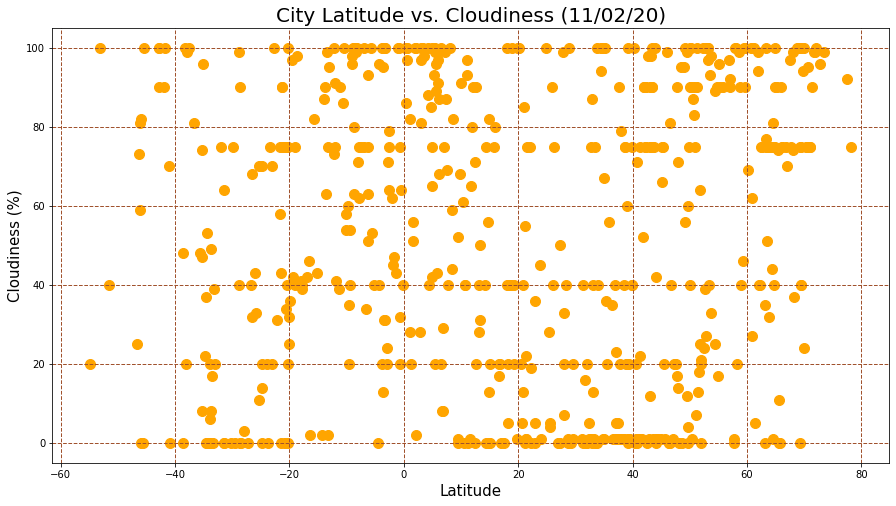

In [53]:
plt.figure(figsize=(15,8))
plt.scatter(city_weather_df['Latitude'], city_weather_df['Cloudiness'], s=100, c='orange')
plt.title(f'City Latitude vs. Cloudiness ({todayDate})',fontsize =20)
plt.xlabel('Latitude',fontsize =15)
plt.ylabel('Cloudiness (%)',fontsize =15)
plt.grid(color='sienna', linestyle='--', linewidth=1)
plt.show()

### Latitude vs. Wind Speed Plot

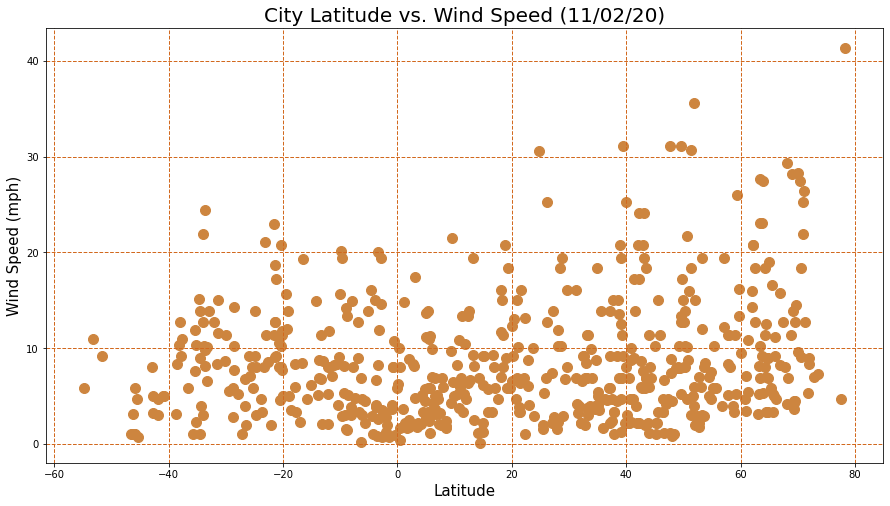

In [57]:
plt.figure(figsize=(15,8))
plt.scatter(city_weather_df['Latitude'], city_weather_df['Wind Speed'], s=100, c='peru')
plt.title(f'City Latitude vs. Wind Speed ({todayDate})',fontsize =20)
plt.xlabel('Latitude',fontsize =15)
plt.ylabel('Wind Speed (mph)',fontsize =15)
plt.grid(color='chocolate', linestyle='--', linewidth=1)
plt.show()